# ***Sınıf Dengesizliği - Class Imbalancy***

## ***Kalp Krizi Riski***

Sınıf dengesizliğine sahip [kalp krizi riski](https://sci2s.ugr.es/keel/dataset.php?cod=980)'ne ilişkin [veri kümesini](https://sci2s.ugr.es/keel/dataset/data/imbalanced/cleveland-0_vs_4.zip) kullanacagiz.

- Lojistik Regresyon modeli oluşturup modelinizin performansını ölçün,
- Değişik yöntemler ve sınıf oranlarını deneyerek, sınıf dengesizliğinin üstesinden gelin ve performansı en yüksek yöntemi ve sınıflar arası oranı belirleyin.
---

In [1]:
import pandas as pd
import numpy as np
# grafiksel araclar
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
sns.set(style="whitegrid")
# logistic regresyon icin
from sklearn.linear_model import LogisticRegression
# lineer regresyon icin
from sklearn.linear_model import LinearRegression
# egitim verisini ayirmak icin
from sklearn.model_selection import train_test_split
# hata matrisi olusturmak icin
from sklearn.metrics import confusion_matrix
# tahmin performansi icin
from sklearn.metrics import mean_absolute_error
from statsmodels.tools.eval_measures import mse, rmse
# performans metrikleri icin
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import classification_report
# orneklem artirma icin
from sklearn.utils import resample
from imblearn.over_sampling import SMOTE
from imblearn.over_sampling import ADASYN


# uyarilari dikkate alma
import warnings
warnings.filterwarnings('ignore')

# pandas varsayilan olarak cok sayida sutun veya satir varsa tumunu gostermez
# bu nedenle 100 sutun ve satir gostermesi icin
pd.options.display.max_rows = 100
pd.options.display.max_columns = 100

# virgulden sonra belirli sayida basamak gosterimi icin 
pd.options.display.float_format = '{:,.3f}'.format
# aciklama sutunun tam cikmasi icin
pd.options.display.max_colwidth = 100

# font tanimlamalari
title_font = {'family': 'times new roman', 'color': 'darkred', 
              'weight': 'bold', 'size': 14}
axis_font  = {'family': 'times new roman', 'color': 'darkred', 
              'weight': 'bold', 'size': 14}

# veri setini dataframe icerisine yukle
heart_attack = pd.read_csv('data/heart_attack.csv')

- .dat dosyasinin sutunlari ile ilgili bilgilerin bulundugu satirlari silip sutun isimlerinin oldugu satirlari comma seperated olarak birakiyoruz. Veri seti age ile baslayip num sutunuyla bitiyor. Sonrasinda dosya uzantisini .csv olarak degistirdik.

- Fonksiyon tanimlamalari.

In [2]:
# performance degerlerini tutacak df
performance_df = pd.DataFrame( columns=['model', 'type', 'accuracy', 
                                        'error_rate', 'precision', 'sensitivity',
                                        'specifity', 'f1score', 'support_ratio'])

# dogruluk degerlerini df kaydeden fonksiyon
def save_performance(model, y_train, y_train_pred, y_test, y_test_pred):
    global performance_df
    # eger model varsa tekrar kaydetme
    if (performance_df.model==model).any():
        return None
    # hata matrisi degerleri 
    confusion_matrix_train = confusion_matrix(y_train, y_train_pred,)
    tn = confusion_matrix_train[0][0]
    tp = confusion_matrix_train[1][1]
    fp = confusion_matrix_train[0][1]
    fn = confusion_matrix_train[1][0]
    # sadece specifity icin hata matrisi mutlaka gerekiyor 
    # diger metrikler icin hazir fonksiyonlar mevcut
    # support degeri y_train ortalamasi ile hesaplandi, 1 olan sinifin ort
    performance_df = performance_df.append({'model': model, 
                                            'type': 'train',
                                            'accuracy':  accuracy_score(y_train, y_train_pred), 
                                           'error_rate': 1 - accuracy_score(y_train, y_train_pred), 
                                           'precision': precision_score(y_train, y_train_pred),
                                           'sensitivity': recall_score(y_train, y_train_pred),
                                           'specifity': (tn)/(tn + fp),
                                           'f1score': f1_score(y_train, y_train_pred),
                                           'support_ratio': y_train.mean()},
                                           ignore_index=True)
    # hata matrisi degerleri
    confusion_matrix_test = confusion_matrix(y_test, y_test_pred)
    tn = confusion_matrix_test[0][0]
    tp = confusion_matrix_test[1][1]
    fp = confusion_matrix_test[0][1]
    fn = confusion_matrix_test[1][0]
    # metrikler hata matrisinden hesaplandi
    performance_df = performance_df.append({'model': model, 
                                            'type': 'test',
                                            'accuracy': (tn + tp)/(fn + fp + tn + tp), 
                                           'error_rate': (1 - (tn + tp)/(fn + fp + tn + tp)), 
                                           'precision': (tp)/(fp + tp),
                                           'sensitivity': (tp)/(tp + fn),
                                           'specifity': (tn)/(tn + fp),
                                           'f1score': f1_score(y_test, y_test_pred),
                                           'support_ratio': y_test.mean()},
                                           ignore_index=True)
    return None

# model olusturan fonksiyon
# model adi, X ve Y parametreleri alir
def make_model(model, X, Y):
    # egitim ve test veri kumelerine ayirma
    X_train, X_test, Y_train, Y_test =  train_test_split(X, Y, test_size=0.20, random_state=111)
    # log reg model nesnesi olustur
    log_reg = LogisticRegression()
    # modeli egit
    log_reg.fit(X_train, Y_train)
    # tahmin yap
    Y_train_pred = log_reg.predict(X_train)
    Y_test_pred = log_reg.predict(X_test)
    # performans degerlerini kaydet
    save_performance(model, Y_train, Y_train_pred, Y_test, Y_test_pred)
    #save_performance(8, 'ADASYN egitim', confusion_matrix_train, Y_train, Y_train_pred)
    display(performance_df)
    

In [3]:
display(performance_df)

,model,type,accuracy,error_rate,precision,sensitivity,specifity,f1score,support_ratio


In [4]:
heart_attack.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 177 entries, 0 to 176
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       177 non-null    float64
 1   sex       177 non-null    float64
 2   cp        177 non-null    float64
 3   trestbps  177 non-null    float64
 4   chol      177 non-null    float64
 5   fbs       177 non-null    float64
 6   restecg   177 non-null    float64
 7   thalach   177 non-null    float64
 8   exang     177 non-null    float64
 9   oldpeak   177 non-null    float64
 10  slope     177 non-null    float64
 11  ca        177 non-null    object 
 12  thal      177 non-null    object 
 13  num       177 non-null    object 
dtypes: float64(11), object(3)
memory usage: 19.5+ KB


- object tipindeki degiskenler incelendiginde bazi null degerler tepit edildi. Bu degerler giderilmeli ve degiskenler numerik yapilmali.

In [5]:
for val in ['ca', 'thal','num']:
    print(val,heart_attack[val].unique())
    print(val,heart_attack[val].value_counts(), sep='\n')

ca ['0.0' '2.0' '1.0' '3.0' '<null>']
ca
0.0       133
1.0        24
2.0         9
3.0         8
<null>      3
Name: ca, dtype: int64
thal ['6.0' '3.0' '7.0' '<null>']
thal
3.0       131
7.0        37
6.0         8
<null>      1
Name: thal, dtype: int64
num ['negative' 'positive']
num
negative    164
positive     13
Name: num, dtype: int64


- null degerlileri tahmin yaparak doldurmak icin ayri bir df ye kaydedelim.

In [6]:
# null degerli satirlar ayri df
# ca veya (|) thal degeri '<null>' olan satirlari ayir
heart_attack_nulls = heart_attack.loc[(heart_attack.ca=='<null>') | (heart_attack.thal=='<null>')]
heart_attack_nulls

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
44,53.000,0.000,3.000,128.000,216.000,0.000,2.000,115.000,0.000,0.000,1.000,0.0,<null>,negative
85,52.000,1.000,3.000,138.000,223.000,0.000,0.000,169.000,0.000,0.000,1.000,<null>,3.0,negative
142,58.000,1.000,2.000,125.000,220.000,0.000,0.000,144.000,0.000,0.400,2.000,<null>,7.0,negative
146,38.000,1.000,3.000,138.000,175.000,0.000,0.000,173.000,0.000,0.000,1.000,<null>,3.0,negative


In [7]:
# null degerli satirlarin indexleri
null_indexes = heart_attack.loc[(heart_attack.ca=='<null>') | (heart_attack.thal=='<null>')].index

In [8]:
# index leri direkt drop metoduna parametre olarak verebiliriz
# axis default olarak 0, yani row lari drop eder
heart_attack.drop(null_indexes,inplace=True)

- String degerleri numerik hale cevirmeliyiz.

In [9]:
# to_numeric metodu object data tipini numerik yapar
heart_attack['ca'] = pd.to_numeric(heart_attack['ca'])
heart_attack['thal'] = pd.to_numeric(heart_attack['thal'])


In [10]:
# num degeri encode edilir
heart_attack['num'].replace({'negative': 0, 'positive': 1}, inplace=True)

In [11]:
heart_attack.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 173 entries, 0 to 176
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       173 non-null    float64
 1   sex       173 non-null    float64
 2   cp        173 non-null    float64
 3   trestbps  173 non-null    float64
 4   chol      173 non-null    float64
 5   fbs       173 non-null    float64
 6   restecg   173 non-null    float64
 7   thalach   173 non-null    float64
 8   exang     173 non-null    float64
 9   oldpeak   173 non-null    float64
 10  slope     173 non-null    float64
 11  ca        173 non-null    float64
 12  thal      173 non-null    float64
 13  num       173 non-null    int64  
dtypes: float64(13), int64(1)
memory usage: 20.3 KB


### ***Logistic Regression Model***

- Hedef (bagimli) degisken : num
- Aciklayici (bagimsiz) degiskenler : Diger tum degiskenler

In [12]:
# hedef ve aciklayici degiskenler
Y = heart_attack['num']
X = heart_attack.drop('num',axis=1)

# model olustur
make_model('Ilk model', X, Y)

,model,type,accuracy,error_rate,precision,sensitivity,specifity,f1score,support_ratio
0,Ilk model,train,0.986,0.014,1.000,0.778,1.000,0.875,0.065
1,Ilk model,test,0.914,0.086,1.000,0.250,1.000,0.400,0.114


- Modelimin accuracy degeri yuksek olmasina ragmen test sonuclarimin sensitivity ve f1score degerleri cok dusuk bu da sinif dengesizliginden kaynaklaniyor.

- Sinif dengesizligini grafikte incelersek.

Pozitif orani : %7.51
Negatif orani : %92.49


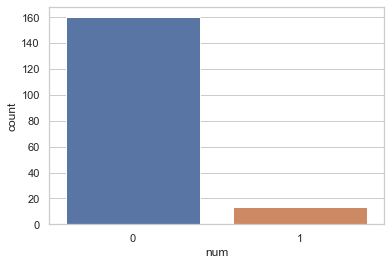

In [13]:
# degisken degerlerinin sayisal grafigi
x = sns.countplot(heart_attack.num)

print("Pozitif orani : %{:.2f}".format(sum(heart_attack.num)/len(heart_attack.num)*100))
print("Negatif orani : %{:.2f}".format((len(heart_attack.num)-sum(heart_attack.num))/len(heart_attack.num)*100))

### ***Resample ile Orneklem Artirma***

In [14]:
# negatif ve pozitif degerler ayri df
negatives = heart_attack[heart_attack.num==0]
positives = heart_attack[heart_attack.num==1]

# verilerin aynisindan n_samples parametresi kadar random cogaltir
incremented_positives = resample(positives, replace = True,
                                 n_samples=len(negatives), random_state = 111)

# negatiflerle artirilmis pozitifleri concat et
incremented_heart_attack = pd.concat([negatives, incremented_positives])
# sayilari kontrol et
incremented_heart_attack.num.value_counts()

1    160
0    160
Name: num, dtype: int64

In [15]:
# hedef ve aciklayici degiskenler
Y = incremented_heart_attack['num']
X = incremented_heart_attack.drop('num',axis=1)

# model olustur
make_model('Resample', X, Y)

,model,type,accuracy,error_rate,precision,sensitivity,specifity,f1score,support_ratio
0,Ilk model,train,0.986,0.014,1.000,0.778,1.000,0.875,0.065
1,Ilk model,test,0.914,0.086,1.000,0.250,1.000,0.400,0.114
2,Resample,train,0.973,0.027,0.949,1.000,0.945,0.974,0.504
3,Resample,test,0.969,0.031,0.939,1.000,0.939,0.969,0.484


### ***SMOTE ile Orneklem Artirma***

In [16]:
# hedef ve aciklayici degiskenler
Y = heart_attack.num
X = heart_attack.drop('num', axis=1)

# SMOTE dengesizlik varsa sample uretir
sm = SMOTE(random_state=27)
X_smote, Y_smote = sm.fit_sample(X, Y)


# model olustur
make_model('SMOTE', X_smote, Y_smote)

,model,type,accuracy,error_rate,precision,sensitivity,specifity,f1score,support_ratio
0,Ilk model,train,0.986,0.014,1.000,0.778,1.000,0.875,0.065
1,Ilk model,test,0.914,0.086,1.000,0.250,1.000,0.400,0.114
2,Resample,train,0.973,0.027,0.949,1.000,0.945,0.974,0.504
3,Resample,test,0.969,0.031,0.939,1.000,0.939,0.969,0.484
4,SMOTE,train,0.980,0.020,0.963,1.000,0.961,0.981,0.504
5,SMOTE,test,0.969,0.031,0.939,1.000,0.939,0.969,0.484


### ***ADASYN ile Orneklem Artirma***

In [17]:
# hedef ve aciklayici degiskenler
Y = heart_attack.num
X = heart_attack.drop('num', axis=1)

# ADASYN dengesizlik varsa sample uretir
ad = ADASYN()
X_adasyn, Y_adasyn = ad.fit_sample(X, Y)

make_model('ADASYN', X_adasyn, Y_adasyn)

,model,type,accuracy,error_rate,precision,sensitivity,specifity,f1score,support_ratio
0,Ilk model,train,0.986,0.014,1.000,0.778,1.000,0.875,0.065
1,Ilk model,test,0.914,0.086,1.000,0.250,1.000,0.400,0.114
2,Resample,train,0.973,0.027,0.949,1.000,0.945,0.974,0.504
3,Resample,test,0.969,0.031,0.939,1.000,0.939,0.969,0.484
4,SMOTE,train,0.980,0.020,0.963,1.000,0.961,0.981,0.504
5,SMOTE,test,0.969,0.031,0.939,1.000,0.939,0.969,0.484
6,ADASYN,train,0.980,0.020,0.963,1.000,0.960,0.981,0.514
7,ADASYN,test,0.969,0.031,0.933,1.000,0.944,0.966,0.438
